In [49]:
import numpy as np
import os
import pandas as pd
import plotly.express as px #used for data visualization
import matplotlib.pyplot as plt
from textblob import TextBlob

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/netflix_titles.csv')

In [36]:
df.shape

(6234, 12)

In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [48]:
#2 ways
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

# X=df.groupby('rating')['rating'].size().reset_index()   #error
# print(X)

      rating  counts
0          G      37
1      NC-17       2
2         NR     218
3         PG     184
4      PG-13     286
5          R     508
6      TV-14    1698
7       TV-G     149
8      TV-MA    2027
9      TV-PG     701
10      TV-Y     143
11     TV-Y7     169
12  TV-Y7-FV      95
13        UR       7


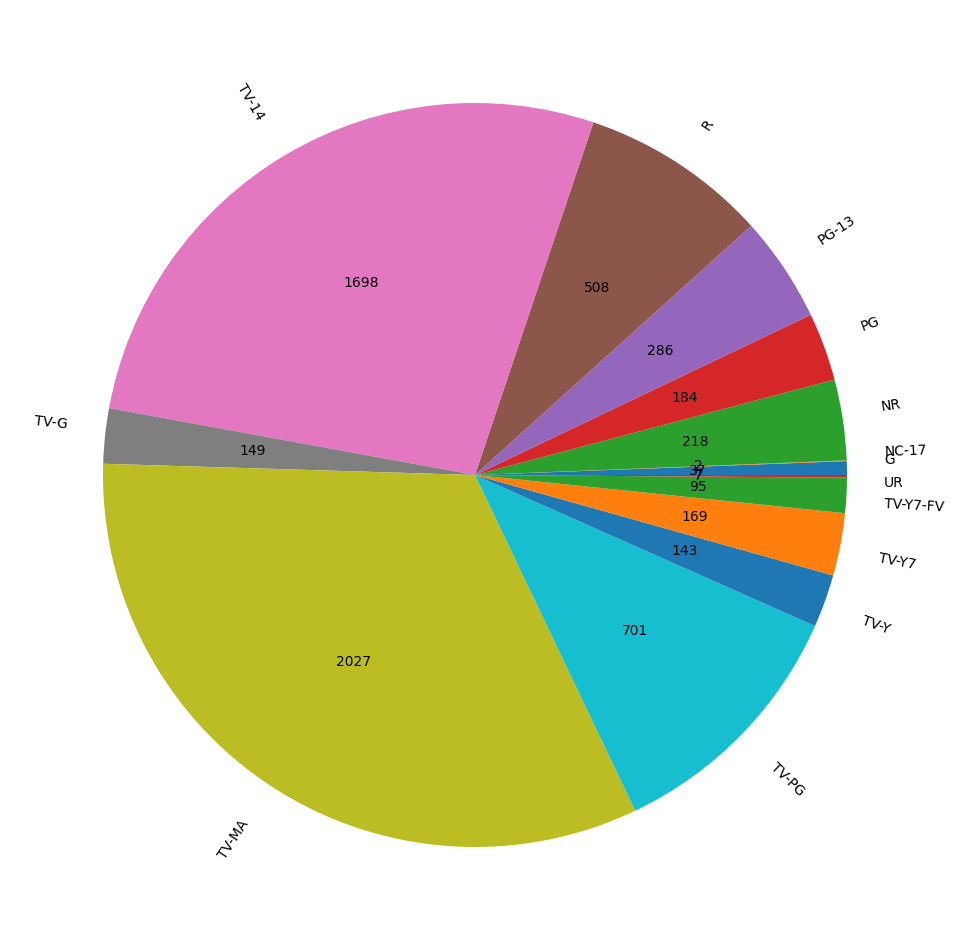

In [177]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

# Pie chart of number of TVshows/movies of each rating type
# Pie chart requires a numeric array
plt.figure(figsize=(12,15))
plt.pie(  x['counts'], labels=x['rating'],
          labeldistance=1.1,
          rotatelabels = True,
          autopct=make_autopct(x['counts']),
          startangle=0)
plt.show()

In [73]:
# Analyzing the top 5 Directors on Netflix
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Director not specified,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Director not specified,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Director not specified,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [76]:
# Take director column, convert to str, split using , as delimiter, expand means put each string obtained in
# separate column, and stack them to add columns to the end
directors_list = df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0              Richard Finn
      1                Tim Maltby
1     0    Director not specified
2     0    Director not specified
3     0    Director not specified
                    ...          
6229  0    Director not specified
6230  0    Director not specified
6231  0    Director not specified
6232  0    Director not specified
6233  0    Director not specified
Length: 6821, dtype: object


In [81]:
directors_list = directors_list.to_frame()
directors_list.reset_index(drop=True, inplace=True)
print(directors_list)

                    Director
0               Richard Finn
1                 Tim Maltby
2     Director not specified
3     Director not specified
4     Director not specified
...                      ...
6816  Director not specified
6817  Director not specified
6818  Director not specified
6819  Director not specified
6820  Director not specified

[6821 rows x 1 columns]


In [87]:
directors_list.columns = ['Director']
directors_list=directors_list[directors_list['Director']!='Director not specified']
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count').sort_values(by=['Total Count'], ascending = False)
print(directors)

In [90]:
top5Directors = directors.head()
print(top5Directors)

          Director  Total Count
196      Jan Suter           18
2967   Raúl Campos           18
2366  Marcus Raboy           14
1779     Jay Karas           14
1777   Jay Chapman           12


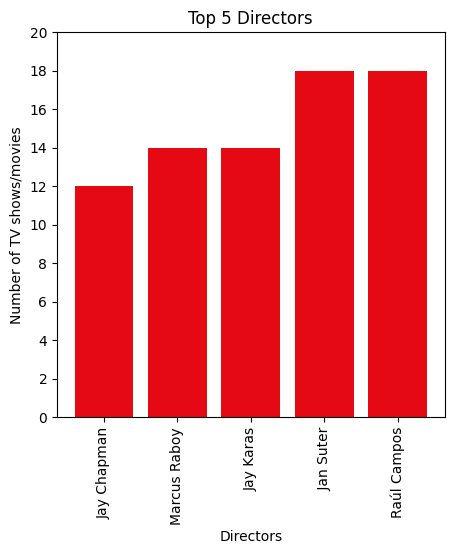

In [102]:
plt.figure(figsize=(5,5))
plt.bar(x=top5Directors['Director'], height=top5Directors['Total Count'], color='#E50914')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 22, step=2))
plt.title('Top 5 Directors')
plt.xlabel('Directors')
plt.ylabel('Number of TV shows/movies')
# barChart = px.bar(top5Directors, x='Total Count', y = 'Director', title = 'Top 5 Directors on Netflix')
plt.show()

In [125]:
# Number of Movies and TV Shows Released per Year
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year",
                            "type": "Type"}
                 )
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')
pivot_table = df2.pivot(index='Release Year', columns='Type', values='Total Count').fillna(0)


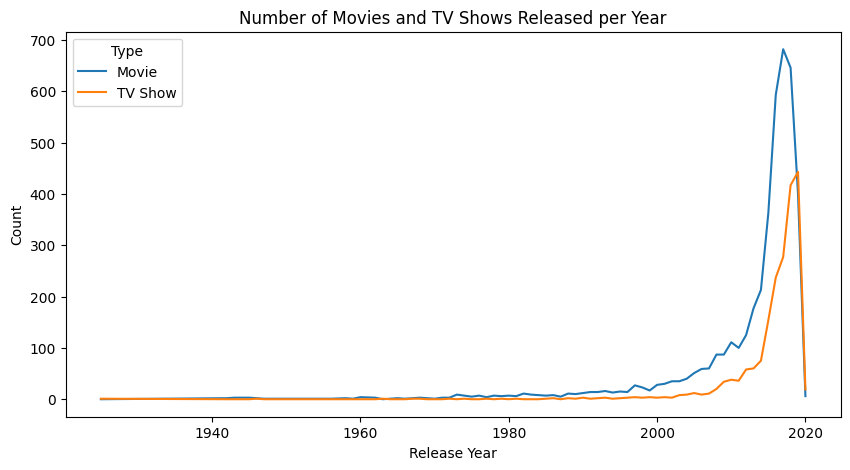

In [144]:
pivot_table.plot(kind='line', figsize=(10,5), title='Number of Movies and TV Shows Released per Year',
                 xlabel='Release Year', ylabel='Count', legend=True)
plt.show()


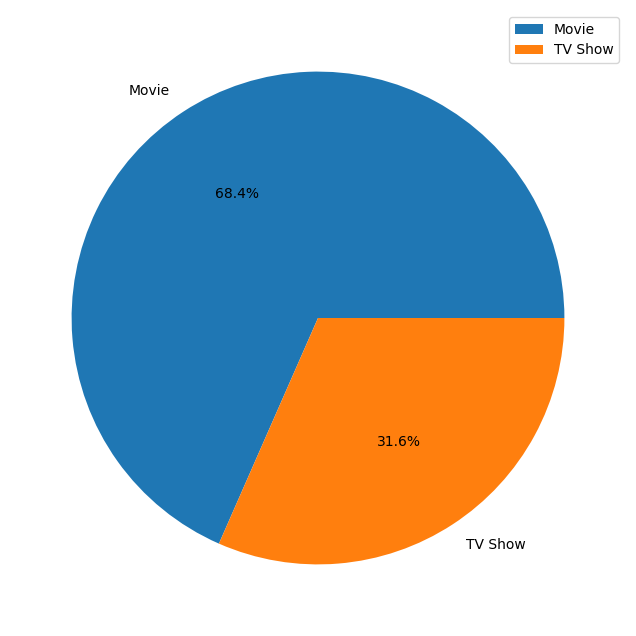

In [132]:
df3=df1.groupby(['Type']).size().reset_index(name='Total Count')
print(df3)

plt.figure(figsize=(8,8))
plt.pie(df3['Total Count'], labels=df3['Type'], autopct='%1.1f%%')
plt.legend()
plt.show()

In [168]:
# print(df.head()
genre_count = df.groupby('listed_in').size().reset_index(name='Total count')
genre_count.head(10)

,listed_in,Total count
0,Action & Adventure,68
1,"Action & Adventure, Anime Features, Children &...",1
2,"Action & Adventure, Anime Features, Classic Mo...",1
3,"Action & Adventure, Anime Features, Horror Movies",1
4,"Action & Adventure, Anime Features, Internatio...",25
5,"Action & Adventure, Anime Features, Sci-Fi & F...",5
6,"Action & Adventure, Children & Family Movies",2
7,"Action & Adventure, Children & Family Movies, ...",3
8,"Action & Adventure, Children & Family Movies, ...",2
9,"Action & Adventure, Children & Family Movies, ...",1


In [160]:
genre_count=genre_count.sort_values(by=['Total count'], ascending=False)
top10_genre=genre_count.head(10)

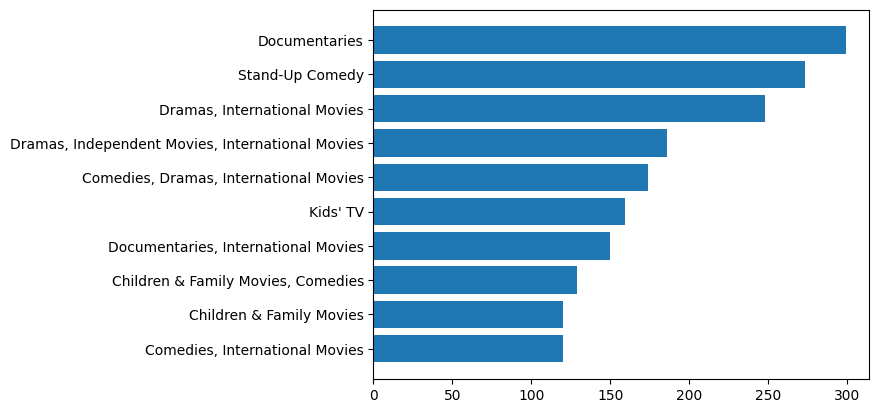

In [167]:
# without reversing it shows smallest to largest top to bottom
plt.barh(top10_genre['listed_in'][::-1], top10_genre['Total count'][::-1])
plt.show()